In [1]:
!pip install yfinance

In [2]:
import yfinance as yf

In [3]:
stock = yf.download("GOOG",start = "2010-01-01",end = "2025-01-01")

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
stock.head()

Price,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,
2010-01-04,15.536651,15.605068,15.474429,15.541608,78541293
2010-01-05,15.468232,15.563670,15.407498,15.547309,120638494
2010-01-06,15.078297,15.514587,15.031197,15.514587,159744526
2010-01-07,14.727283,15.121432,14.691338,15.106558,257533695
2010-01-08,14.923614,14.954104,14.603585,14.675225,189680313


In [5]:
closing = stock["Close"]

In [6]:
closing = closing.dropna()

In [7]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.signal import savgol_filter

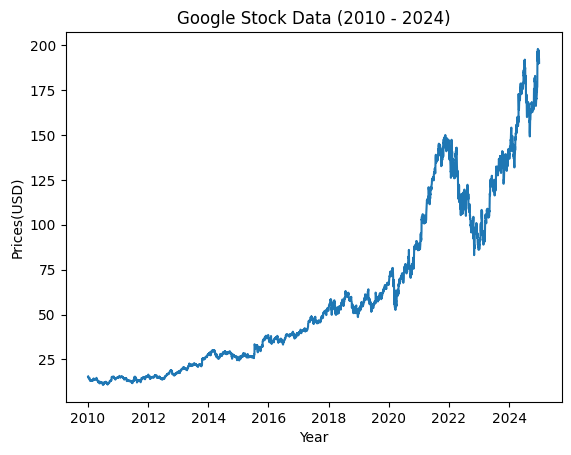

In [8]:
plt.plot(closing)
plt.title("Google Stock Data (2010 - 2024)")
plt.xlabel("Year")
plt.ylabel("Prices(USD)")
plt.show()

#Scaling

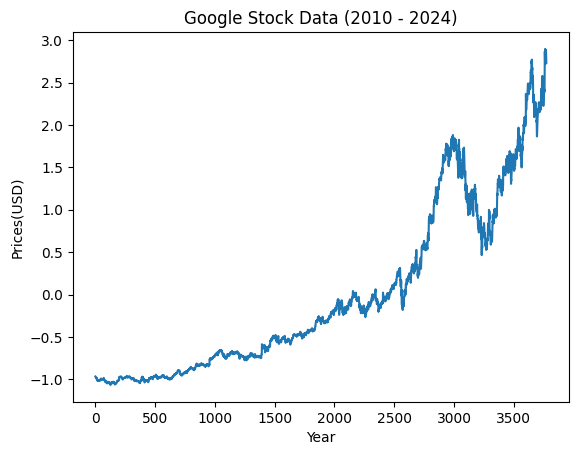

In [9]:
closing = np.array(closing)
scaler = StandardScaler()
scaled = scaler.fit_transform(closing)
scaled = scaled.flatten()
plt.plot(scaled)
plt.title("Google Stock Data (2010 - 2024)")
plt.xlabel("Year")
plt.ylabel("Prices(USD)")
plt.show()

In [10]:
closing = scaled

#Filtering Noise

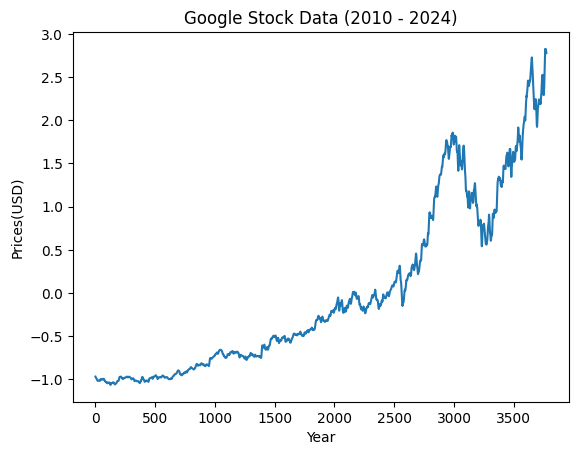

In [11]:
smoothened = savgol_filter(closing,window_length= 13,polyorder = 2)
plt.plot(smoothened)
plt.title("Google Stock Data (2010 - 2024)")
plt.xlabel("Year")
plt.ylabel("Prices(USD)")
plt.show()

In [12]:
closing  = smoothened

#Preprocessing

In [13]:
x = []
y = []
window_size = 6
for i in range(window_size,len(closing)):
  x.append(closing[i-window_size:i-1])
  y.append(closing[i-1])

#Split Data

In [14]:
train_size = int(0.7*len(closing))

X_train,Y_train = x[:train_size],y[:train_size]
X_test,Y_test = x[train_size:],y[train_size:]

#Using Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,root_mean_squared_error

In [16]:
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

#Prediction

In [17]:
prediction = model.predict(X_test)

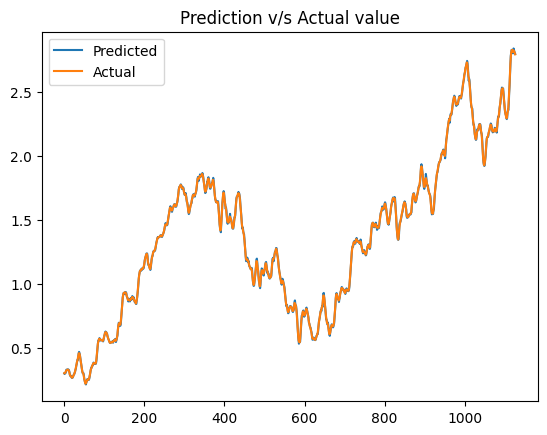

In [18]:
line1, = plt.plot(prediction,label = "Predicted")
line2, = plt.plot(Y_test,label = "Actual")
plt.title("Prediction v/s Actual value")
plt.legend([line1,line2],["Predicted",'Actual'])
plt.show()

In [19]:
mse_loss = mean_squared_error(Y_test,prediction)
rmse_loss = root_mean_squared_error(Y_test,prediction)
print(mse_loss)
print(rmse_loss)

8.047275940761344e-05
0.008970661035153064


#Forecast

In [20]:
num_forecast = 1000
predicted = []
for _ in range(num_forecast):
  data = [closing[-window_size+1:]]
  forecast = model.predict(data)
  predicted.append(forecast[0])

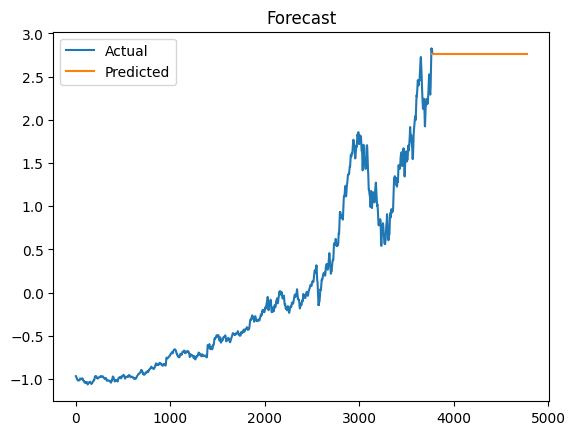

In [21]:
line1, = plt.plot(closing)
line2, = plt.plot(np.arange(start = len(closing),stop = len(closing)+len(predicted)),predicted)
plt.title("Forecast")
plt.legend([line1,line2],["Actual","Predicted"])
plt.show()